In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
deliveries_df=pd.read_csv("deliveries.csv")
matches_df=pd.read_csv("matches.csv")

In [3]:
merged_data = pd.merge(deliveries_df, matches_df, how='inner', left_on='match_id', right_on='id')

In [4]:
# Assuming your DataFrame is named 'merged_data'
merged_data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
id                       0
season                   0
city                  1700
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 372
win_by_runs              0
win_by_wickets           0
player_of_match        372
venue                    0
umpire1                500
u

In [5]:
# Assuming your DataFrame is named 'merged_data'
missing_values = merged_data.isnull().sum()

# Find the column with the most missing values
column_with_most_missing = missing_values.idxmax()

print("Column with the most missing values:", column_with_most_missing)


Column with the most missing values: fielder


In [6]:
# Group by 'city' and count the unique seasons
city_season_count = matches_df.groupby('city')['season'].nunique()

# Find the city with the maximum number of unique seasons
city_with_most_seasons = city_season_count.idxmax()

print("City hosting most number of seasons:", city_with_most_seasons)


City hosting most number of seasons: Delhi


In [7]:
# Group by 'season' and count the number of matches
matches_per_year = matches_df.groupby('season')['id'].count()

# Find the year with the maximum number of matches
year_with_most_matches = matches_per_year.idxmax()

print("Year with the most number of matches:", year_with_most_matches)


Year with the most number of matches: 2013


In [8]:
# Filter data for Mumbai Indians in 2011
mi_2011_matches = matches_df[(matches_df['season'] == 2011) & ((matches_df['team1'] == 'Mumbai Indians') | (matches_df['team2'] == 'Mumbai Indians'))]

# Count the number of wins by Mumbai Indians in 2011
mi_2011_wins = mi_2011_matches[mi_2011_matches['winner'] == 'Mumbai Indians'].shape[0]

print("Maximum wins by Mumbai Indians in 2011:", mi_2011_wins)


Maximum wins by Mumbai Indians in 2011: 10


In [9]:
# Calculate the percentage of each toss decision
toss_decision_percentage = matches_df['toss_decision'].value_counts(normalize=True) * 100

print("Percentage of choosing to bat:", toss_decision_percentage['bat'])
print("Percentage of choosing to field:", toss_decision_percentage['field'])


Percentage of choosing to bat: 38.75661375661375
Percentage of choosing to field: 61.24338624338625


In [10]:
# Filter data for matches where the toss decision was to bat second and the team won
batting_second_wins = matches_df[(matches_df['toss_decision'] == 'field') & (matches_df['winner'] == matches_df['team2'])]

# Group by season and count the number of matches won by batting second in each season
batting_second_wins_per_year = batting_second_wins.groupby('season')['id'].count()

# Find the years with the most number of wins when batting second
years_with_most_batting_second_wins = batting_second_wins_per_year[batting_second_wins_per_year == batting_second_wins_per_year.max()]

print("Years with the most number of wins when batting second:", years_with_most_batting_second_wins.index.tolist())


Years with the most number of wins when batting second: [2016]


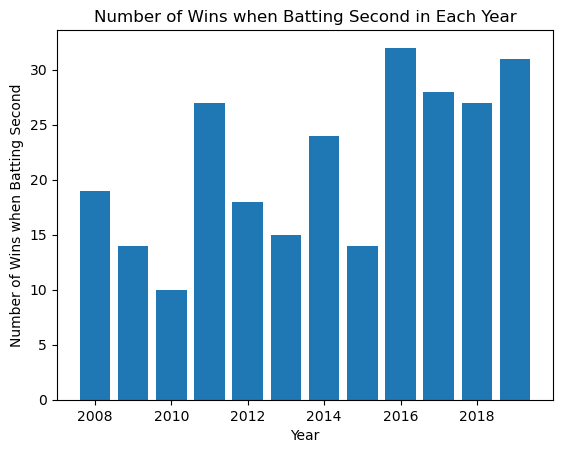

In [11]:
# Filter data for matches where the toss decision was to bat second and the team won
batting_second_wins = matches_df[(matches_df['toss_decision'] == 'field') & (matches_df['winner'] == matches_df['team2'])]

# Group by season and count the number of matches won by batting second in each season
batting_second_wins_per_year = batting_second_wins.groupby('season')['id'].count()

# Plotting a bar chart
plt.bar(batting_second_wins_per_year.index, batting_second_wins_per_year)
plt.xlabel('Year')
plt.ylabel('Number of Wins when Batting Second')
plt.title('Number of Wins when Batting Second in Each Year')
plt.show()


In [12]:
batting_second_wins = matches_df[(matches_df['toss_decision'] == 'field') & (matches_df['winner'] == matches_df['team2'])]

# Group by season and count the number of matches won by batting second in each season
batting_second_wins_per_year = batting_second_wins.groupby('season')['id'].count()

In [13]:
batting_second_wins_per_year.sort_values(ascending=True)

season
2010    10
2009    14
2015    14
2013    15
2012    18
2008    19
2014    24
2011    27
2018    27
2017    28
2019    31
2016    32
Name: id, dtype: int64

In [14]:
merdata = pd.merge(deliveries_df, matches_df, how='inner', left_on='match_id', right_on='id')
merdata=merdata.dropna()

In [15]:
#Most number of wickets taken by a bowler
most_wickets_bowler = deliveries_df[deliveries_df['dismissal_kind'].notnull() & (deliveries_df['dismissal_kind'] != 'run out')]
most_wickets_bowler = most_wickets_bowler['bowler'].value_counts().idxmax()
answer_12 = most_wickets_bowler
print("Answer 12:", answer_12)

Answer 12: SL Malinga


In [17]:
#Bowlers with the maximum number of extras
bowlers_max_extras = deliveries_df[deliveries_df['extra_runs'] > 0]['bowler'].value_counts().idxmax()
answer_14 = bowlers_max_extras
print("Answer 14:", answer_14)

Answer 14: SL Malinga


In [18]:
#Venue that has hosted the most number of IPL matches
venue_most_matches = matches_df['venue'].value_counts().idxmax()
answer_15 = venue_most_matches
print("Answer 15:", answer_15)

Answer 15: Eden Gardens


In [20]:
#Top three batsmen with the most number of run-outs across seasons
batsmen_run_out = deliveries_df[deliveries_df['dismissal_kind'] == 'run out']['batsman'].value_counts().head(3).index.tolist()
answer_17 = batsmen_run_out
print("Answer 17:", answer_17)

Answer 17: ['MS Dhoni', 'RG Sharma', 'KD Karthik']


In [ ]:
#Total runs scored by V Kohli when the bowler was JJ Bumrah
kohli_runs_vs_bumrah = deliveries_df[(deliveries_df['batsman'] == 'V Kohli') & (deliveries_df['bowler'] == 'JJ Bumrah')]['batsman_runs'].sum()
answer_18 = kohli_runs_vs_bumrah
print("Answer 18:", answer_18)

In [21]:
#Player dismissed the maximum number of times via caught and bowled across all seasons
caught_and_bowled_player = deliveries_df[deliveries_df['dismissal_kind'] == 'caught and bowled']['batsman'].value_counts().idxmax()
answer_19 = caught_and_bowled_player
print("Answer 19:", answer_19)

Answer 19: SK Raina


In [22]:
# Assuming deliveries_df contains the deliveries dataset and matches_df contains the matches dataset

# Filter data for the year 2019
deliveries_2019 = deliveries_df[deliveries_df['match_id'].isin(matches_df[matches_df['season'] == 2019]['id'])]

# Calculate total runs, 6's, and 4's for each batsman in 2019
batsman_runs_2019 = deliveries_2019.groupby('batsman')['batsman_runs'].sum()
batsman_sixes_2019 = deliveries_2019[deliveries_2019['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count()
batsman_fours_2019 = deliveries_2019[deliveries_2019['batsman_runs'] == 4].groupby('batsman')['batsman_runs'].count()

# Calculate total runs by hitting 6's and 4's
batsman_sixes_fours_2019 = batsman_runs_2019 + (batsman_sixes_2019 * 6) + (batsman_fours_2019 * 4)

# Find the batsman with the highest total runs by hitting 6's and 4's
batsman_highest_runs_2019 = batsman_sixes_fours_2019.idxmax()


In [23]:
batsman_highest_runs_2019

'DA Warner'

In [24]:
# Calculate strike rate for each batsman
batsman_strike_rate = deliveries_df.groupby('batsman')['batsman_runs'].sum() / deliveries_df.groupby('batsman')['ball'].count() * 100

# Find the batsman with the highest strike rate
batsman_strike_rate.sort_values(ascending=True)


batsman
ND Doshi            0.000000
V Pratap Singh      0.000000
IC Pandey           0.000000
U Kaul              0.000000
L Ablish            0.000000
                     ...    
AD Russell        179.950187
S Sharma          200.000000
RS Sodhi          200.000000
Umar Gul          205.263158
B Stanlake        250.000000
Length: 516, dtype: float64

In [28]:
#Strike rate of Kohli in 2016
kohli_2016 = deliveries_df[(deliveries_df['batsman'] == 'V Kohli') & (matches_df['date'] == 2016)]
kohli_strike_rate_2016 = (kohli_2016['batsman_runs'].sum() / kohli_2016.shape[0]) * 100
answer_13 = round(kohli_strike_rate_2016, 2)
print("Answer 13:", answer_13)

Answer 13: nan


C:\Users\shamb\AppData\Local\Temp\ipykernel_23516\2788251304.py:3: RuntimeWarning: invalid value encountered in scalar divide
  kohli_strike_rate_2016 = (kohli_2016['batsman_runs'].sum() / kohli_2016.shape[0]) * 100
